Import packages and functions

In [8]:
import sys
sys.path.append('../../../')


In [9]:
from scripts.forecast import DataGenerator, make_photoz_bin_edges, compare_fisher_matrices 
from scripts.luminosity_functions import def_clusters_xlf
import matplotlib
from scripts.utils import np, plt, set_mpl
set_mpl()
%matplotlib inline


set palette to pastel
set matplotlib rc


Set up parameters of cluster population

In [10]:
fiducial_params = {'Omega_c': 0.25, 'Omega_b': 0.05,
                   'h': 0.7, 'sigma8': 0.8, 'n_s': 0.96,
                   'transfer_function': 'boltzmann_camb',
                   'baryons_power_spectrum': 'nobaryons',
                   'matter_power_spectrum': 'linear'}

fsky = 0.658
powspec_pars_dict_clu = {
    'slim': 4.4e-14,
    'l_min': 10,
    'l_max': 150,
    'log_bins': 41,
    'fsky': fsky,
    'has_rsd': True,
    'density_multiplier': 1.0,
    'camb_llimber': 110,
    'xlf': def_clusters_xlf,
    'use_camb': True,
    'delta_i': 3,
    'remove_ignored_cells': True,
}



zmin_clu = 0.1
zmax_clu = 0.8
sigma0_clu = 0.01
f_fail_clu = 0.02
bins_clu = make_photoz_bin_edges(zmin_clu, zmax_clu, k=1, sigma_0=sigma0_clu)

powspec_pars_dict_clu['sigma_0'] = sigma0_clu
powspec_pars_dict_clu['f_fail'] = f_fail_clu

Run DataGenerator object to generate dndz, Cell, etc

Total Clusters sources: 87338 at fsky=0.658[27144 deg^2]
Photo-z parameters: self.sigma_0=0.01, self.f_fail=0.02
calculating CAMB...
CAMB calculation time: 10.751734733581543


calc Covariance: 100%|██████████| 1275/1275 [00:17<00:00, 74.77it/s] 


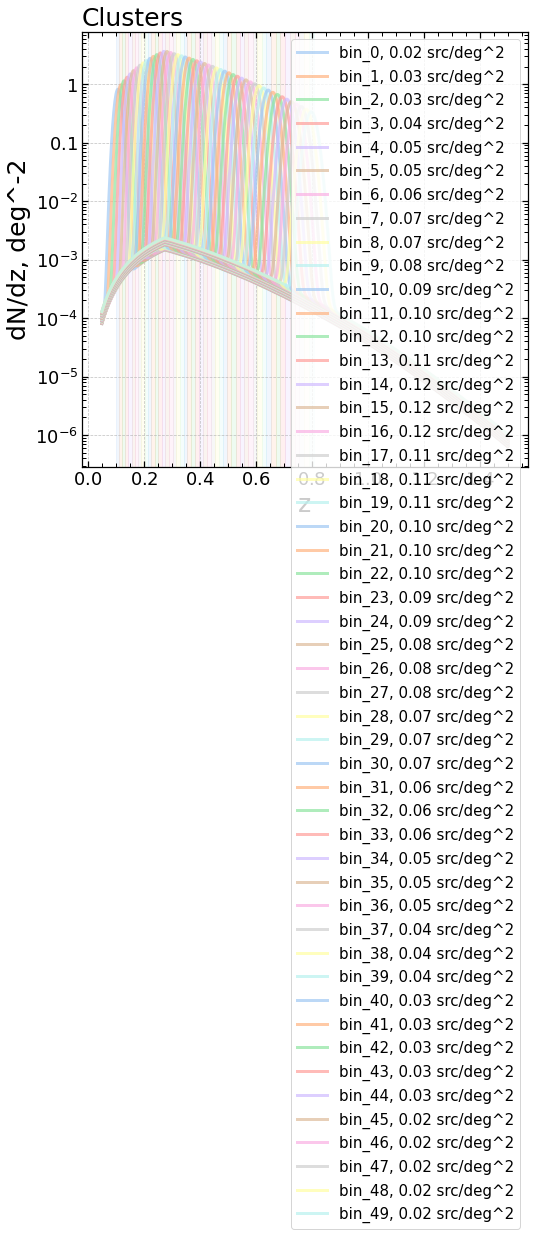

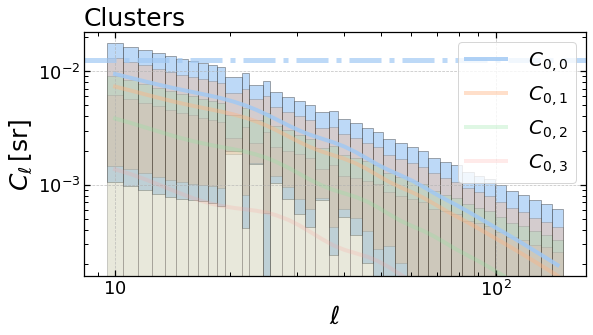

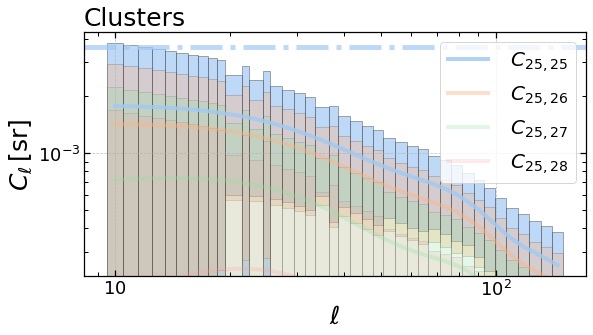

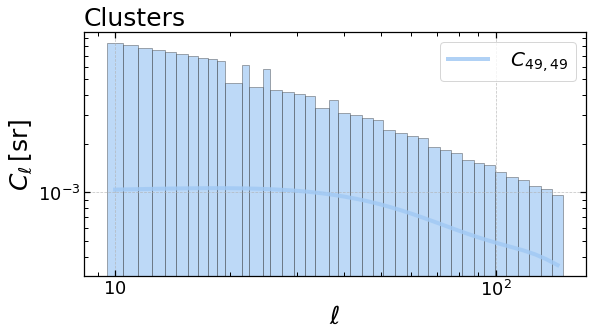

In [11]:
datagen_clu = DataGenerator(
                                 fiducial_params=fiducial_params, set_name = 'Clusters')

datagen_clu.invoke(**powspec_pars_dict_clu, bin_left_edges=bins_clu, plot_dndz=True, plot_cell=True);
datagen_clu.invert_cov();

Calculate the Fisher matrix

In [12]:
F = datagen_clu.get_Fisher_matrix(jac_step = 0.001, jac_order = 2)[0]

Start Jacobian calculation (cosmological part): jac_step=0.001, jac_order=2
Finished Jacobian calculation (cosmological part) in 104.63 seconds


Plot the Fisher matrix


Clusters
FoM: 2.64e+08
Omega_c: 0.250 +- 0.034 (13.4 %)
Omega_b: 0.050 +- 0.041 (81.8 %)
h: 0.700 +- 0.512 (73.2 %)
n_s: 0.960 +- 0.351 (36.6 %)
sigma_8: 0.800 +- 0.012 (1.4 %)
-------


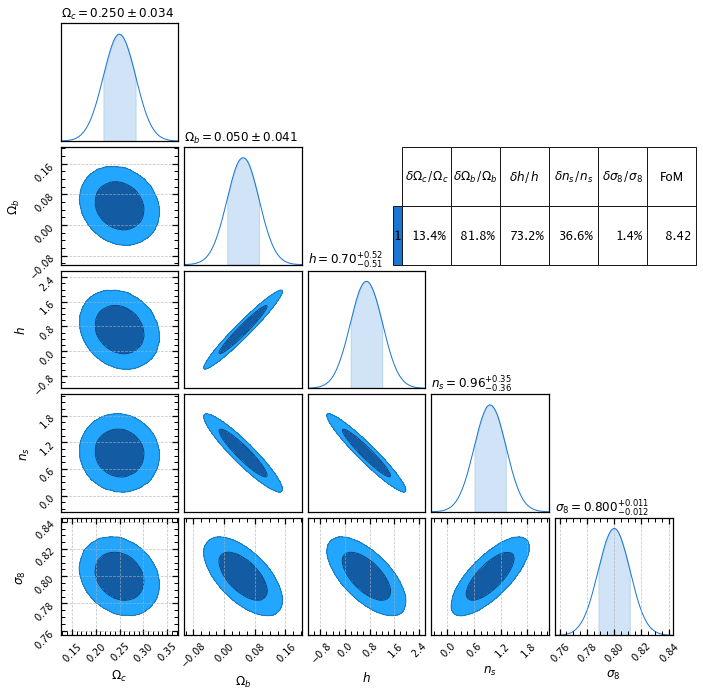

In [13]:
compare_fisher_matrices([F]);